In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## The decision tree

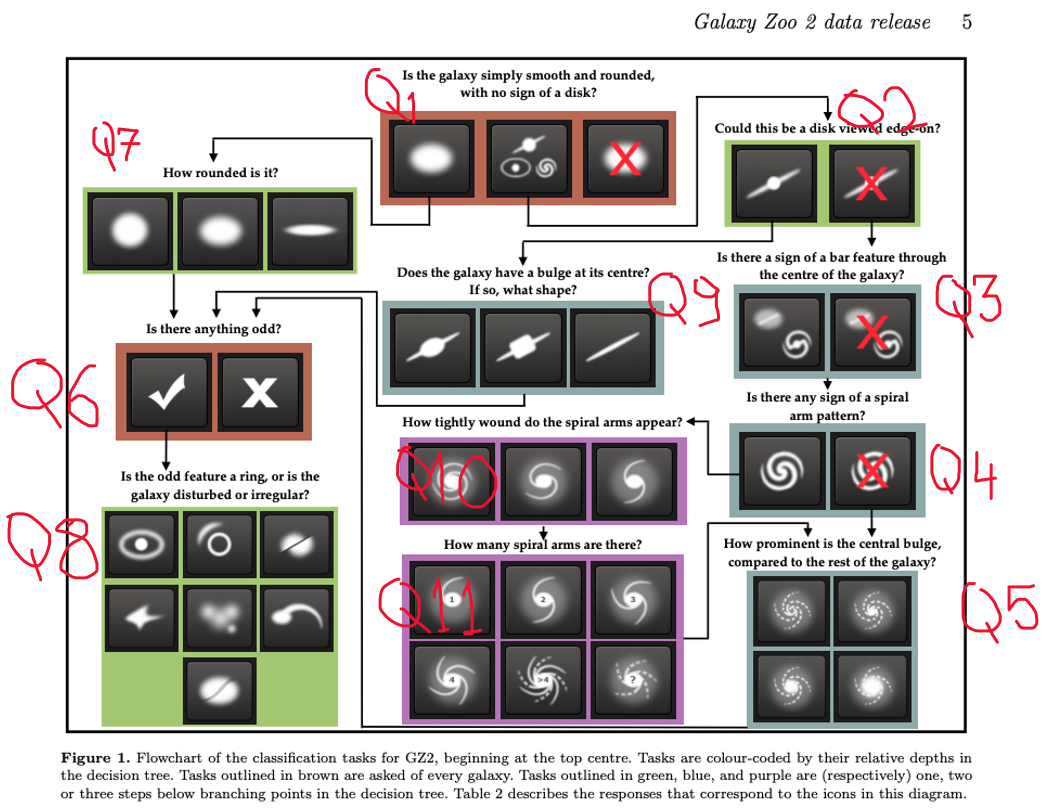

In [4]:
from IPython.display import Image
Image(filename=r'/Users/foivos/Documents/DL_Workshop_2020/GalaxyZoo/Notebooks/images/decision_tree.png',width=800, height=400)

## Pytorch implementation 

mxnet is about ~2-3 times faster ==> 2-3 times cheaper on AWS

In [23]:
import torch
class HEAD(torch.nn.Module):
    def __init__(self,in_features=512):
        super().__init__()
        
        self.q1  = torch.nn.Linear(in_features=in_features, out_features=3) # softmax
        self.q1bal  = torch.nn.Linear(in_features=3, out_features=in_features) # relu
        
        
        in_features_q2 = 2* in_features
        self.q2  = torch.nn.Linear(in_features=in_features_q2, out_features=2) # sigmoid
        self.q2bal  = torch.nn.Linear(in_features=2, out_features=in_features) 
        
        in_features_q3 = 2* in_features
        self.q3  = torch.nn.Linear(in_features=in_features_q3, out_features=2) # sigmoid
        self.q3bal  = torch.nn.Linear(in_features=2, out_features=in_features) 
        
        in_features_q4 = 2* in_features
        self.q4  = torch.nn.Linear(in_features=in_features_q4, out_features=2) # sigmoid
        self.q4bal  = torch.nn.Linear(in_features=2, out_features=in_features) 
        
        in_features_q5 = 3* in_features
        self.q5  = torch.nn.Linear(in_features=in_features_q5, out_features=4) # sigmoid
        
        in_features_q6 = 3* in_features
        self.q6  = torch.nn.Linear(in_features=in_features_q6, out_features=2) # sigmoid
        self.q6bal  = torch.nn.Linear(in_features=2, out_features=in_features) 
        
        in_features_q7 = 2* in_features
        self.q7  = torch.nn.Linear(in_features=in_features_q7, out_features=3) # sigmoid
        self.q7bal  = torch.nn.Linear(in_features=3, out_features=in_features) 
        
        in_features_q8 = 2* in_features
        self.q8  = torch.nn.Linear(in_features=in_features_q8, out_features=7) # sigmoid
        
        in_features_q9 = 2* in_features
        self.q9  = torch.nn.Linear(in_features=in_features_q9, out_features=3) # sigmoid
        self.q9bal  = torch.nn.Linear(in_features=3, out_features=in_features) 
        
        in_features_q10 = 2* in_features
        self.q10 = torch.nn.Linear(in_features=in_features_q10, out_features=3) # sigmoid
        self.q10bal  = torch.nn.Linear(in_features=3, out_features=in_features) 
        
        in_features_q11 = 2* in_features
        self.q11 = torch.nn.Linear(in_features=in_features_q11, out_features=6) # sigmoid
        self.q11bal  = torch.nn.Linear(in_features=6, out_features=in_features) 
        
    def forward(self,input):
        
        
        q1 = self.q1(input)
        q1 = torch.softmax(q1,dim=-1)
        q1bal = self.q1bal(q1)
        
        q2in = torch.cat([q1bal,input],dim=-1)
        q2 = self.q2 (q2in)
        q2 = torch.sigmoid(q2)
        q2bal = self.q2bal(q2)
        q2bal = torch.relu(q2bal)
        
        q3in = torch.cat([input,q2bal],dim=-1)
        q3 = self.q3(q3in)
        q3 = torch.sigmoid(q3)
        q3bal = self.q3bal(q3)
        q3bal = torch.relu(q3bal)
        
        q4in = torch.cat([input,q3bal],dim=-1)
        q4 = self.q4(q4in)
        q4 = torch.sigmoid(q4)
        q4bal = self.q4bal(q4)
        q4bal = torch.relu(q4bal)
        
        
        q10in = torch.cat([input,q4bal],dim=-1)
        q10 = self.q10(q10in) 
        q10 = torch.sigmoid(q10)
        q10bal = self.q10bal(q10)
        q10bal = torch.relu(q10bal)
        
        q11in = torch.cat([input,q10bal],dim=-1)
        q11 = self.q11(q11in)
        q11 = torch.sigmoid(q11)
        q11bal = self.q11bal(q11)
        q11bal = torch.relu(q11bal)
        
        q5in = torch.cat([input,q4bal,q11bal],dim=-1)
        q5 = self.q5(q5in)
        q5 = torch.sigmoid(q5)
        
        q7in = torch.cat([input,q1bal],dim=-1)
        q7 = self.q7(q7in)
        q7 = torch.sigmoid(q7)
        q7bal = self.q7bal(q7)
        q7bal = torch.relu(q7bal)
        
        q9in = torch.cat([input,q2bal],dim=-1)
        q9 = self.q9(q9in)
        q9 = torch.sigmoid(q9)
        q9bal = self.q9bal(q9)
        q9bal = torch.relu(q9bal)
        
        
        q6in = torch.cat([input,q7bal,q9bal],dim=-1)
        q6 = self.q6(q6in)
        q6 = torch.sigmoid(q6)
        q6bal = self.q6bal(q6)
        q6bal = torch.relu(q6bal)
        
        
        q8in = torch.cat([input,q6bal],dim=-1)
        q8 = self.q8(q8in)
        q8 = torch.sigmoid(q8)
        
        
        qall = torch.cat([q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11],dim=-1)
        return qall

In [24]:
def torch_count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

In [25]:
net = HEAD()
xx = torch.rand(3,512)

In [11]:
out = net(xx)
print (out.shape)

torch.Size([3, 37])


In [14]:
%timeit out = net(xx)

2.9 ms ± 424 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
torch_count_parameters(net)

57381

In [37]:
xx = torch.rand(3,512)

In [38]:
out = net(xx)

In [39]:
out.shape

torch.Size([3, 37])

In [40]:
out

tensor([[0.2816, 0.2217, 0.4967, 0.3878, 0.5382, 0.4742, 0.5739, 0.4838, 0.4363,
         0.4400, 0.4865, 0.5675, 0.6025, 0.5025, 0.5357, 0.5620, 0.5451, 0.6433,
         0.4241, 0.5070, 0.3909, 0.4436, 0.4487, 0.5303, 0.6220, 0.5205, 0.5072,
         0.4251, 0.4639, 0.5456, 0.4969, 0.3672, 0.5056, 0.5184, 0.4946, 0.4932,
         0.5546],
        [0.2238, 0.3186, 0.4576, 0.3460, 0.5100, 0.5298, 0.5644, 0.4589, 0.4804,
         0.4672, 0.5462, 0.5452, 0.5412, 0.4750, 0.4921, 0.5691, 0.5443, 0.5023,
         0.4365, 0.5173, 0.4705, 0.4988, 0.4362, 0.5203, 0.5955, 0.4816, 0.4763,
         0.4447, 0.4714, 0.5190, 0.4905, 0.4255, 0.5547, 0.5245, 0.5615, 0.4377,
         0.5474],
        [0.2573, 0.2779, 0.4648, 0.3534, 0.5470, 0.5273, 0.5702, 0.4491, 0.4632,
         0.4122, 0.4977, 0.5275, 0.5820, 0.4993, 0.5414, 0.5346, 0.5147, 0.5592,
         0.4252, 0.4542, 0.3700, 0.4406, 0.4925, 0.4810, 0.6018, 0.5679, 0.4345,
         0.4386, 0.4816, 0.4769, 0.4059, 0.5037, 0.4257, 0.4431, 0.5871, 

In [28]:
import mxnet as mx
from mxnet import gluon
from mxnet.gluon import nn, HybridBlock

from mxprosthesis.nn.layers.densenormed import *

class GZooHEADLayer(HybridBlock):
    def __init__(self, mid_features, out_features, **kwards):
        super().__init__(**kwards)

        self.d1 = DenseNormed(units=mid_features)
        self.d2 = gluon.nn.Dense(units=out_features)


    def hybrid_forward(self,F,input):
        out = self.d1(input)
        out = F.relu(out)
        out = self.d2(out)

        return out


class GZooHEAD(HybridBlock):
    def __init__(self,in_features=512, **kwards):
        super().__init__(**kwards)




        self.q1  = GZooHEADLayer(mid_features=in_features, out_features=3) # softmax
        self.q1bal  = gluon.nn.Dense(units=in_features) # softmax

        self.q2  = GZooHEADLayer(mid_features=in_features, out_features=2) # sigmoid
        self.q2bal  = gluon.nn.Dense(units=in_features) # softmax

        self.q3  = GZooHEADLayer(mid_features=in_features, out_features=2) # sigmoid
        self.q3bal  = gluon.nn.Dense(units=in_features) # softmax

        self.q4  = GZooHEADLayer(mid_features=in_features, out_features=2) # sigmoid
        self.q4bal  = gluon.nn.Dense(units=in_features) # softmax

        self.q5  = GZooHEADLayer(mid_features=in_features, out_features=4) # sigmoid

        self.q6  = GZooHEADLayer(mid_features=in_features, out_features=2) # sigmoid
        self.q6bal  = gluon.nn.Dense(units=in_features) # softmax

        self.q7  = GZooHEADLayer(mid_features=in_features, out_features=3) # sigmoid
        self.q7bal  = gluon.nn.Dense(units=in_features) # softmax

        self.q8  = GZooHEADLayer(mid_features=in_features, out_features=7) # sigmoid

        self.q9  = GZooHEADLayer(mid_features=in_features, out_features=3) # sigmoid
        self.q9bal  = gluon.nn.Dense(units=in_features) # softmax

        self.q10 = GZooHEADLayer(mid_features=in_features, out_features=3) # sigmoid
        self.q10bal  = gluon.nn.Dense(units=in_features) # softmax

        self.q11 = GZooHEADLayer(mid_features=in_features, out_features=6) # sigmoid
        self.q11bal  = gluon.nn.Dense(units=in_features) # softmax

    def hybrid_forward(self,F, input):


        q1 = self.q1(input)
        q1 = F.softmax(q1,axis=-1)
        q1bal = self.q1bal(q1)

        q2in = F.concat(*[q1bal,input],dim=-1)
        q2 = self.q2 (q2in)
        q2 = F.sigmoid(q2)
        q2bal = self.q2bal(q2)
        q2bal = F.relu(q2bal)

        q3in = F.concat(*[input,q2bal],dim=-1)
        q3 = self.q3(q3in)
        q3 = F.sigmoid(q3)
        q3bal = self.q3bal(q3)
        q3bal = F.relu(q3bal)

        q4in = F.concat(*[input,q3bal],dim=-1)
        q4 = self.q4(q4in)
        q4 = F.sigmoid(q4)
        q4bal = self.q4bal(q4)
        q4bal = F.relu(q4bal)


        q10in = F.concat(*[input,q4bal],dim=-1)
        q10 = self.q10(q10in)
        q10 = F.sigmoid(q10)
        q10bal = self.q10bal(q10)
        q10bal = F.relu(q10bal)

        q11in = F.concat(*[input,q10bal],dim=-1)
        q11 = self.q11(q11in)
        q11 = F.sigmoid(q11)
        q11bal = self.q11bal(q11)
        q11bal = F.relu(q11bal)

        q5in = F.concat(*[input,q4bal,q11bal],dim=-1)
        q5 = self.q5(q5in)
        q5 = F.sigmoid(q5)

        q7in = F.concat(*[input,q1bal],dim=-1)
        q7 = self.q7(q7in)
        q7 = F.sigmoid(q7)
        q7bal = self.q7bal(q7)
        q7bal = F.relu(q7bal)

        q9in = F.concat(*[input,q2bal],dim=-1)
        q9 = self.q9(q9in)
        q9 = F.sigmoid(q9)
        q9bal = self.q9bal(q9)
        q9bal = F.relu(q9bal)


        q6in = F.concat(*[input,q7bal,q9bal],dim=-1)
        q6 = self.q6(q6in)
        q6 = F.sigmoid(q6)
        q6bal = self.q6bal(q6)
        q6bal = F.relu(q6bal)


        q8in = F.concat(*[input,q6bal],dim=-1)
        q8 = self.q8(q8in)
        q8 = F.sigmoid(q8)


        qall = F.concat(*[q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11],dim=-1)
        return qall

In [29]:
net = GZooHEAD()
net.initialize()

In [30]:
from mxnet import nd 
xx = nd.random.uniform(shape=[3,512])

In [31]:
net.summary(xx)

--------------------------------------------------------------------------------
        Layer (type)                                Output Shape         Param #
               Input                                    (3, 512)               0
             Dense-1                                    (3, 512)          262144
         BatchNorm-2                                    (3, 512)            2048
       DenseNormed-3                                    (3, 512)               0
             Dense-4                                      (3, 3)            1539
     GZooHEADLayer-5                                      (3, 3)               0
             Dense-6                                    (3, 512)            2048
             Dense-7                                    (3, 512)          524288
         BatchNorm-8                                    (3, 512)            2048
       DenseNormed-9                                    (3, 512)               0
            Dense-10        

In [32]:
%timeit net(xx)

17.4 ms ± 3.37 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
net.hybridize()

In [35]:
%timeit net(xx)

4.1 ms ± 705 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
